<img src="./unal.png" align=left width="150" height="150"></img>



$\,$
---

<h2 align="center"> ANÁLISIS SOBRE ARRESTOS EN EEUU</h2>
<h3 align="center">Clasificación no jerarquica</h3>


$\;$

---

El set de datos USArrests contiene información sobre el número de delitos (asaltos, asesinatos y secuestros) junto con el porcentaje de población urbana para cada uno de los 50 estados de USA. Se pretende estudiar si existe una agrupación subyacente de los estados empleando K-means-clustering.

In [1]:
data("USArrests")
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


Como la magnitud de los valores difiere notablemente entre variables, se procede a escalarlas antes de aplicar el clustering.

In [2]:
datos <- scale(USArrests)

### Estimando el número óptimo de clusters

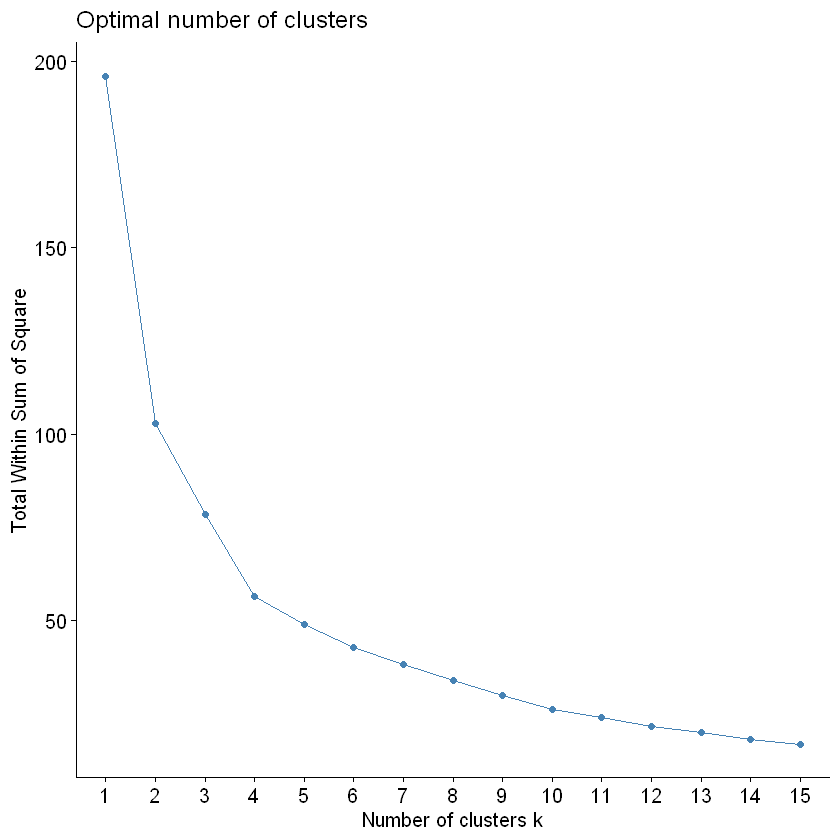

In [4]:
library(factoextra)
fviz_nbclust(x = datos, FUNcluster = kmeans, method = "wss", k.max = 15, 
             diss = get_dist(datos, method = "euclidean"), nstart = 50)

### Estimando el número óptimo de clusters a PEDAL

In [6]:
require(factoextra)
require(purrr)
calcular_totwithinss <- function(n_clusters, datos, iter.max=1000, nstart=50){
  # Esta función aplica el algoritmo kmeans y devuelve la suma total de
  # cuadrados internos.
  cluster_kmeans <- kmeans(centers = n_clusters, x = datos, iter.max = iter.max,
                           nstart = nstart)
  return(cluster_kmeans$tot.withinss)
}

# Se aplica esta función con para diferentes valores de k
total_withinss <- map_dbl(.x = 1:15,
                          .f = calcular_totwithinss,
                          datos = datos)
total_withinss

[1] 196.00000 102.86240  78.32327  56.40317  48.94420  42.83303  38.25764
 [8]  33.77737  29.86789  26.18348  23.66980  21.57556  19.99500  18.04643
[15]  16.62795

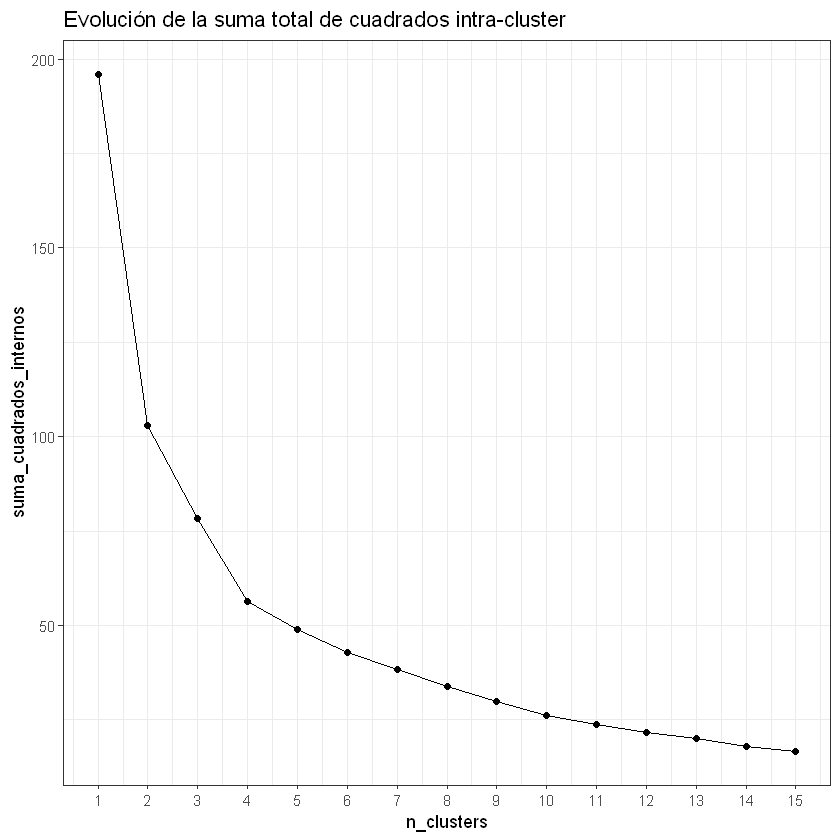

In [7]:
data.frame(n_clusters = 1:15, suma_cuadrados_internos = total_withinss) %>%
  ggplot(aes(x = n_clusters, y = suma_cuadrados_internos)) +
    geom_line() +
    geom_point() +
    scale_x_continuous(breaks = 1:15) +
    labs(title = "Evolución de la suma total de cuadrados intra-cluster") +
    theme_bw()

En este análisis, a partir de 4 clusters la reducción en la suma total de cuadrados internos parece estabilizarse, indicando que K = 4 es una buena opción.


El paquete factoextra también permite obtener visualizaciones de las agrupaciones resultantes. Si el número de variables (dimensionalidad) es mayor de 2, automáticamente realiza un PCA y representa las dos primeras componentes principales.

Es importante aclarar que en K-MEANS **cada cluster está representado por su centroide**

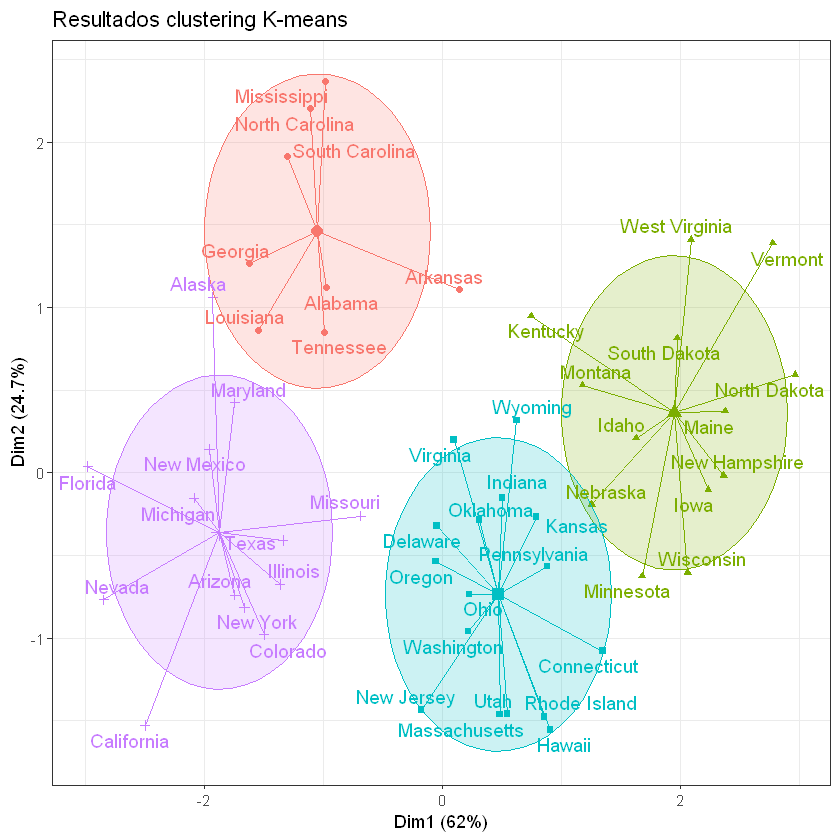

In [8]:
set.seed(123)
km_clusters <- kmeans(x = datos, centers = 4, nstart = 50)

# Las funciones del paquete factoextra emplean el nombre de las filas del
# dataframe que contiene los datos como identificador de las observaciones.
# Esto permite añadir labels a los gráficos.
fviz_cluster(object = km_clusters, data = datos, show.clust.cent = TRUE,
             ellipse.type = "euclid", star.plot = TRUE, repel = TRUE) +
  labs(title = "Resultados clustering K-means") +
  theme_bw() +
  theme(legend.position = "none")